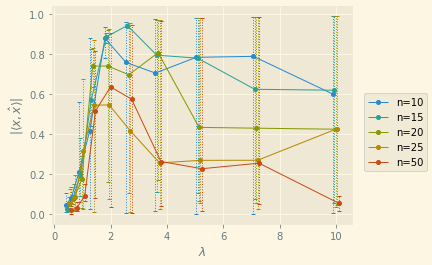

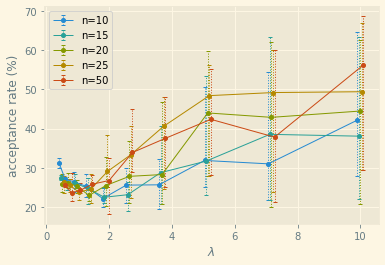

In [5]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle

#Loading the data
run  = "corr__04-05-2022_06:19.pkl"
filename = f"./data/{run}"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()

correlations = np.abs(np.array([l[-2] for l in results])) 
acceptance_rates = np.array([l[-1] for l in results])

dims = list(set([l[1] for l in results]))
dims.sort()

lambdas =  list(set([l[0] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}


with plt.style.context('Solarize_Light2'):
    fig, axes = plt.subplots(nrows=1)

    for i in range(len(dims)):
        means =np.abs(correlations).mean(axis=1)[i*10:(i+1)*10]
        mins = np.abs(correlations).min(axis=1)[i*10:(i+1)*10]
        maxs = np.abs(correlations).max(axis=1)[i*10:(i+1)*10]
        eb = axes.errorbar((i-2)*0.05 + lambdas, means, yerr=[means-mins, maxs-means], label=labels[i], fmt='o-', linewidth=1, markersize=4, capsize=2, elinewidth=1)
        eb[-1][0].set_linestyle(':')
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.show
    plt.savefig(f"figures/correlations_{run}.png", dpi=900)

with plt.style.context('Solarize_Light2'):
    plt.figure()

    for i in range(len(dims)):
        means = 100*acceptance_rates.mean(axis=1)[i*10:(i+1)*10]
        mins = 100*acceptance_rates.min(axis=1)[i*10:(i+1)*10]
        maxs = 100*acceptance_rates.max(axis=1)[i*10:(i+1)*10]
        eb = plt.errorbar((i-2)*0.05 +lambdas, means, yerr=[means-mins, maxs-means], label=labels[i], fmt='o-', linewidth=1, markersize=4, capsize=2, elinewidth=1)
        eb[-1][0].set_linestyle(':')
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (%)")
    
    plt.legend()
    plt.show
    plt.savefig(f"figures/acceptance_rates_{run}.png", dpi=900)

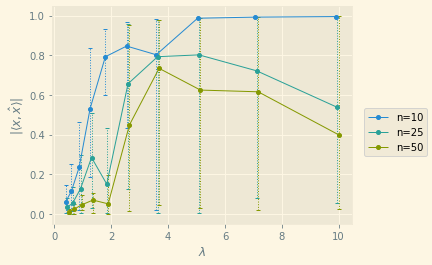

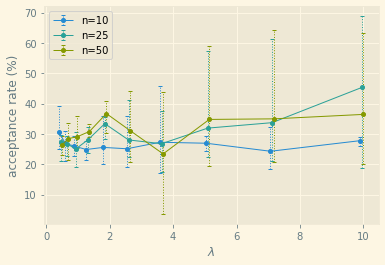

In [1]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle

#Loading the data
run = "corr__06-05-2022_15:05"
filename = f"./data/{run}.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()

correlations = np.abs(np.array([l["correlations"] for l in results])) 
acceptance_rates = np.array([l["acceptance_rates"] for l in results])

dims = list(set([l["dim"] for l in results]))
dims.sort()

lambdas =  list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()


labels = {i: f"n={dim}" for i, dim in enumerate(dims)}


with plt.style.context('Solarize_Light2'):
    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(len(dims)):
        means =np.abs(correlations).mean(axis=1)[i*10:(i+1)*10]
        mins = np.abs(correlations).min(axis=1)[i*10:(i+1)*10]
        maxs = np.abs(correlations).max(axis=1)[i*10:(i+1)*10]
        eb = axes.errorbar((i-2)*0.05 + lambdas, means, yerr=[means-mins, maxs-means], label=labels[i], fmt='o-', linewidth=1, markersize=4, capsize=2, elinewidth=1)
        eb[-1][0].set_linestyle(':')
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.show
    plt.savefig(f"figures/correlations_{run}.png", dpi=900)


    # acceptance rate plot
    plt.figure()

    for i in range(len(dims)):
        means = 100*acceptance_rates.mean(axis=1)[i*10:(i+1)*10]
        mins = 100*acceptance_rates.min(axis=1)[i*10:(i+1)*10]
        maxs = 100*acceptance_rates.max(axis=1)[i*10:(i+1)*10]
        eb = plt.errorbar((i-2)*0.05 +lambdas, means, yerr=[means-mins, maxs-means], label=labels[i], fmt='o-', linewidth=1, markersize=4, capsize=2, elinewidth=1)
        eb[-1][0].set_linestyle(':')
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (%)")
    
    plt.legend()
    plt.show
    plt.savefig(f"figures/acceptance_rates_{run}.png", dpi=900)

In [6]:
correlations[20:30]

array([[1.66859428e-02, 5.57040496e-03, 2.29530667e-02, 1.01880903e-02,
        1.78832882e-03, 1.59978505e-03, 7.30676802e-03, 2.13070783e-02,
        1.69404526e-03, 2.32375585e-02],
       [3.67316030e-02, 1.47203614e-02, 3.77078569e-02, 9.65273397e-04,
        1.04731424e-02, 4.06428492e-02, 2.78218258e-02, 1.86588025e-02,
        1.01462543e-02, 5.15749720e-02],
       [5.59010897e-02, 4.61634687e-02, 7.81273369e-02, 1.82035965e-02,
        2.91200331e-02, 3.35433808e-02, 3.98285982e-02, 3.72653999e-02,
        3.66475316e-02, 9.62635800e-02],
       [9.64947319e-02, 1.02921151e-01, 8.22690719e-02, 2.98573214e-03,
        4.81498006e-02, 4.21556266e-02, 7.39322895e-02, 8.63768938e-02,
        6.27303511e-02, 1.06757905e-01],
       [8.47565398e-02, 4.24350341e-02, 2.27241283e-03, 2.60740726e-02,
        2.63570411e-03, 4.10124876e-03, 6.36695191e-02, 4.83752119e-02,
        1.95672619e-01, 4.37513605e-02],
       [3.02358544e-02, 8.82955263e-01, 1.49714163e-02, 9.44747481e-01,
   